<a href="https://colab.research.google.com/github/vitorlsantana/dotfiles/blob/master/siglla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [299]:
# Importar bibliotecas
import pandas as pd
import sys
import csv
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
from sklearn.preprocessing import OrdinalEncoder
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline



In [300]:
# Salvando o modelo para posterior reuso
# from sklearn.externals import joblib
from joblib import dump, load
# import re

In [301]:
csv.field_size_limit(sys.maxsize)
df = pd.read_csv('https://github.com/leoexcelsus/siglla_phase2/raw/main/ml_dataset_siglla%C2%A3.txt', sep="£",engine='python')
df['uf'] = 'BR'
df['esfera'] = 'federal'
# df.describe()
df

,text,value,uf,esfera
0,"LEI COMPLEMENTAR Nº 140, DE 8 DE DEZEMBRO DE 2...",sim,BR,federal
1,"LEI Nº 6.938, DE 31 DE AGOSTO DE 1981 Regulame...",sim,BR,federal
2,"DECRETO Nº 8.437, DE 22 DE ABRIL DE 2015 Regul...",sim,BR,federal
3,"LEI Nº 13.874, DE 20 DE SETEMBRO DE 2019 Mensa...",sim,BR,federal
4,"LEI No 9.985, DE 18 DE JULHO DE 2000. Mensagem...",sim,BR,federal
...,...,...,...,...
254,Ir para o conteúdo Ir para o rodapé IR PARA O ...,n,BR,federal
255,DIÁRIO OFICIAL DA UNIÃO Publicado em: 22/02/20...,n,BR,federal
256,"PORTARIA N° 121, DE 1º DE MARÇO DE 2016 O SECR...",n,BR,federal
257,DIÁRIO OFICIAL DA UNIÃO Publicado em: 01/03/20...,n,BR,federal


In [302]:
# enc = OrdinalEncoder()
df = df.replace({'value': {'sim': 1, 'n': 0}})
df

,text,value,uf,esfera
0,"LEI COMPLEMENTAR Nº 140, DE 8 DE DEZEMBRO DE 2...",1,BR,federal
1,"LEI Nº 6.938, DE 31 DE AGOSTO DE 1981 Regulame...",1,BR,federal
2,"DECRETO Nº 8.437, DE 22 DE ABRIL DE 2015 Regul...",1,BR,federal
3,"LEI Nº 13.874, DE 20 DE SETEMBRO DE 2019 Mensa...",1,BR,federal
4,"LEI No 9.985, DE 18 DE JULHO DE 2000. Mensagem...",1,BR,federal
...,...,...,...,...
254,Ir para o conteúdo Ir para o rodapé IR PARA O ...,0,BR,federal
255,DIÁRIO OFICIAL DA UNIÃO Publicado em: 22/02/20...,0,BR,federal
256,"PORTARIA N° 121, DE 1º DE MARÇO DE 2016 O SECR...",0,BR,federal
257,DIÁRIO OFICIAL DA UNIÃO Publicado em: 01/03/20...,0,BR,federal


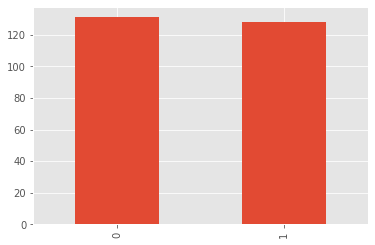

In [303]:
df.value.value_counts().plot(kind='bar')

In [304]:
# Separa os dados de treino e teste (proporção 80/20)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.text, df.value, test_size=0.2, 
                                                    stratify=df.value,random_state=42)

In [305]:
X_train[:10]

175    DIÁRIO OFICIAL DA UNIÃO Publicado em: 25/01/20...
150    PORTARIA Nº 224, DE 19 DE JUNHO DE 2015 O MINI...
172    Ir para o conteúdo Ir para o rodapé IR PARA O ...
147    RESOLUÇÃO No - 4.652, DE 1o - DE ABRIL DE 2015...
52     LEI No 9.985, DE 18 DE JULHO DE 2000. Regulame...
93     RESOLUÇÃO CONAMA nº 281, de 12 de julho de 200...
86     RESOLUÇÃO CONAMA Nº 23, DE 7.12.1994 - DOU 30....
252    O SUPERINTENDENTE DO PATRIMÔNIO DA UNIÃONO RIO...
256    PORTARIA N° 121, DE 1º DE MARÇO DE 2016 O SECR...
140    AÇÃO DIRETA DE INCONSTITUCIONALIDADE 3.580 (6)...
Name: text, dtype: object

In [306]:
# Confere a proporção das classes nos dados de treino e de teste
print('TREINO : ',y_train.shape,'\n', y_train.value_counts(normalize=True),'\n')
print('TESTE  : ',y_test.shape,'\n', y_test.value_counts(normalize=True))

TREINO :  (207,) 
 0    0.507246
1    0.492754
Name: value, dtype: float64 

TESTE  :  (52,) 
 1    0.5
0    0.5
Name: value, dtype: float64


In [307]:
# instancia o transform CountVectorizer
tfidf_vectorizer = TfidfVectorizer()
# tokeniza e cria o vocabulário
tfidf_vectorizer.fit(X_train)
# mostra o vocabulário criado
print('Vocabulário: ')
print(tfidf_vectorizer.vocabulary_)

# encode document
tfidf_vector = tfidf_vectorizer.transform(X_train)
# mostra as dimensões da matrix de frequência
print('\nDimensões da matrix: ')
print(tfidf_vector.shape)

Vocabulário: 
{'diário': 14015, 'oficial': 25762, 'da': 11416, 'união': 35244, 'publicado': 29264, 'em': 15108, '25': 1566, '01': 191, '2011': 1430, 'edição': 14747, '17': 1179, 'seção': 32601, 'página': 29333, 'órgão': 36598, 'presidência': 28444, 'república': 30870, 'casa': 7832, 'civil': 8474, 'portarias': 27963, 'de': 11744, '24': 1538, 'janeiro': 21428, 'ministro': 23883, 'estado': 16323, 'chefe': 8252, 'no': 24958, 'uso': 35309, 'suas': 33265, 'atribuições': 6092, 'etendo': 16620, 'vista': 35949, 'disposto': 13876, 'art': 5652, '1o': 1386, 'do': 14036, 'decreto': 12038, '734': 2543, '11': 642, 'dejunho': 12304, '2003': 1416, 'resolve': 30988, 'nº': 25262, '331': 1762, 'nomear': 25030, 'cláudio': 8600, 'frederico': 18279, 'matos': 23328, 'arruda': 5646, 'para': 26578, 'exercer': 16931, 'ocargo': 25602, 'assessoria': 5821, 'diplomática': 13683, 'vice': 35786, 'darepública': 11633, 'código': 11389, 'das': 11640, '101': 508, 'antonio': 4875, 'palocci': 26545, 'filho': 17724, 'portari

In [308]:
# Define o pipeline incluindo o extrator de 'features do texto e um classificador

pipeline = Pipeline([
    ('vect', CountVectorizer(max_df=1.0, max_features=50000,ngram_range=(1,2))),
    ('tfidf', TfidfTransformer(use_idf=True,norm='l2')),
    ('clf', SGDClassifier(loss='log',alpha=1e-06, penalty='elasticnet', max_iter=60)), # default hinge. to get proba=log or modified_huber
])

In [309]:
%%time
# Treine o modelo(fit)
classificador = pipeline.fit(X_train, y_train)

CPU times: user 2.42 s, sys: 111 ms, total: 2.53 s
Wall time: 2.43 s


In [310]:
# Faça a predição nos dados de teste
predicted = classificador.predict(X_test)

In [311]:
# Mostra a acurácia do modelo nos dados de teste 
classificador.score(X_test,y_test)

0.9615384615384616

In [312]:
# Mostra o f1 score do modelo nos dados de teste (usado quando as classes estão desbalanceadas)
from sklearn.metrics import f1_score
f1_score(y_test, predicted, average='weighted')

0.9614814814814815

In [313]:
# avalie o modelo usando 'claasification_report' do sklearn
from sklearn import metrics
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        26
           1       0.93      1.00      0.96        26

    accuracy                           0.96        52
   macro avg       0.96      0.96      0.96        52
weighted avg       0.96      0.96      0.96        52



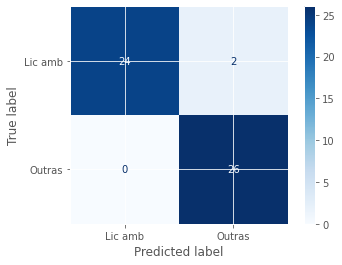

In [314]:
# mostrar a matrix de confusão do modelo sobre todo o dataset
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classificador, X_test, y_test,
                      cmap=plt.cm.Blues,
                      values_format='d', display_labels=('Lic amb', 'Outras'))

In [333]:
# Descobrir quais leis 
predicted = classificador.predict(X_test)
predicted == 1

array([ True, False, False, False,  True,  True, False,  True,  True,
       False,  True,  True, False, False,  True, False,  True, False,
        True,  True, False,  True, False, False,  True, False, False,
       False,  True, False, False, False,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True, False,  True, False,
       False,  True,  True,  True, False,  True,  True,  True,  True,
       False,  True,  True,  True,  True, False, False, False, False,
        True,  True, False, False, False, False,  True,  True, False,
       False, False, False, False,  True, False,  True, False, False,
       False, False, False,  True, False, False, False,  True, False,
        True, False, False, False, False,  True, False,  True,  True,
        True, False, False, False, False, False, False])

In [334]:
X_test.loc[(predicted == 1) & (y_test == 0)]

427    Lei 17445 - 27 de Dezembro de 2012 Publicado n...
258    DIÁRIO OFICIAL DA UNIÃO Publicado em: 24/02/20...
165     DECRETO-LEI No 2.848, DE 7 DE DEZEMBRO DE 194...
Name: text, dtype: object

In [317]:
# fazer predição do tipo de norma para uma nova norma: [Resolução CONAMA 428/2010]
predicted = classificador.predict(['O CONSELHO NACIONAL DO MEIO AMBIENTE-CONAMA, no uso das atribuições e competências que lhe são conferidas pelo art. 8º da Lei nº 6.938, de 31 de agosto de 1981, regulamentado pelo Decreto nº 99.274, de 06 de julho de 1990 e tendo em vista o disposto em seu Regimento Interno, Anexo à Portaria MMA nº 168, de 13 de junho de 2005, e: Considerando a necessidade de regulamentar os procedimentos de licenciamento ambiental de empreendimentos de significativo impacto ambiental que afetem as Unidades de Conservação específicas ou suas zonas de amortecimento, resolve: Art. 1º O licenciamento de empreendimentos de significativo impacto ambiental que possam afetar Unidade de Conservação (UC) específica ou sua Zona de Amortecimento (ZA), assim considerados pelo órgão ambiental licenciador, com fundamento em Estudo de Impacto Ambiental e respectivo Relatório de Impacto Ambiental (EIA/RIMA), só poderá ser concedido após autorização do órgão responsável pela administração da UC ou, no caso das Reservas'])

In [318]:
print('nova predição:\nclasse = ', predicted)
print('classe = ', df.value[predicted])

nova predição:
classe =  [1]
classe =  1    1
Name: value, dtype: int64


In [319]:
csv.field_size_limit(sys.maxsize)
df_uf = pd.read_csv('https://github.com/leoexcelsus/siglla_phase2/raw/main/siglla_uf_test.csv', sep="£",engine='python', dtype={'value': int})
df_uf['esfera'] = 'estadual'
# df.describe()
df_uf

,text,value,uf,esfera
0,"LEI Nº 13.798, DE 9 DE NOVEMBRO DE 2009 Instit...",1,SP,estadual
1,"LEI Nº 13.579, DE 13 DE JULHO DE 2009 Define a...",1,SP,estadual
2,"LEI Nº 13.577, DE 8 DE JULHO DE 2009 Dispõe so...",1,SP,estadual
3,"LEI Nº 13.550, DE 2 DE JUNHO DE 2009 Dispõe so...",1,SP,estadual
4,"LEI Nº 13.007, DE 15 DE MAIO DE 2008 (Projeto ...",1,SP,estadual
...,...,...,...,...
265,"LEI Nº 1.532, DE 22 DE DEZEMBRO DE 2004. Publi...",0,TO,estadual
266,"LEI Nº 2.732, DE 4 DE JUNHO DE 2013. Publicada...",0,TO,estadual
267,"LEI Nº 3.549, DE 31 DE OUTUBRO DE 2019. Public...",0,TO,estadual
268,"LEI Nº 2.534, DE 30 DE NOVEMBRO DE 2011. Publi...",0,TO,estadual


In [320]:
df_final = pd.concat([df, df_uf], ignore_index=True)
df_final

,text,value,uf,esfera
0,"LEI COMPLEMENTAR Nº 140, DE 8 DE DEZEMBRO DE 2...",1,BR,federal
1,"LEI Nº 6.938, DE 31 DE AGOSTO DE 1981 Regulame...",1,BR,federal
2,"DECRETO Nº 8.437, DE 22 DE ABRIL DE 2015 Regul...",1,BR,federal
3,"LEI Nº 13.874, DE 20 DE SETEMBRO DE 2019 Mensa...",1,BR,federal
4,"LEI No 9.985, DE 18 DE JULHO DE 2000. Mensagem...",1,BR,federal
...,...,...,...,...
524,"LEI Nº 1.532, DE 22 DE DEZEMBRO DE 2004. Publi...",0,TO,estadual
525,"LEI Nº 2.732, DE 4 DE JUNHO DE 2013. Publicada...",0,TO,estadual
526,"LEI Nº 3.549, DE 31 DE OUTUBRO DE 2019. Public...",0,TO,estadual
527,"LEI Nº 2.534, DE 30 DE NOVEMBRO DE 2011. Publi...",0,TO,estadual


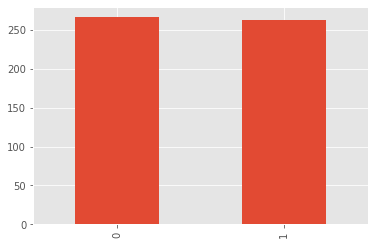

In [335]:
df_final.value.value_counts().plot(kind='bar')

In [321]:
# Separa os dados de treino e teste (proporção 80/20)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_final.text, df_final.value, test_size=0.2, 
                                                    stratify=df_final.value,random_state=42)

In [322]:
# Confere a proporção das classes nos dados de treino e de teste
print('TREINO : ',y_train.shape,'\n', y_train.value_counts(normalize=True),'\n')
print('TESTE  : ',y_test.shape,'\n', y_test.value_counts(normalize=True))

TREINO :  (423,) 
 0    0.503546
1    0.496454
Name: value, dtype: float64 

TESTE  :  (106,) 
 1    0.5
0    0.5
Name: value, dtype: float64


In [323]:
# instancia o transform CountVectorizer
tfidf_vectorizer = TfidfVectorizer()
# tokeniza e cria o vocabulário
tfidf_vectorizer.fit(X_train)
# mostra o vocabulário criado
print('Vocabulário: ')
print(tfidf_vectorizer.vocabulary_)

# encode document
tfidf_vector = tfidf_vectorizer.transform(X_train)
# mostra as dimensões da matrix de frequência
print('\nDimensões da matrix: ')
print(tfidf_vector.shape)

Vocabulário: 
{'resolução': 37333, 'conjunta': 11952, 'sema': 38925, 'iap': 23727, 'nº': 30456, '007': 192, '23': 1800, 'de': 14395, 'dezembro': 16332, '2015': 1667, 'publicado': 35198, 'no': 30112, 'diário': 17009, 'oficial': 31040, '9624': 3686, '27': 1930, 'janeiro': 26042, '2016': 1670, 'súmula': 40872, 'dispõe': 16839, 'sobre': 39792, 'procedimentos': 34515, 'operacionais': 31233, 'do': 17038, 'sistema': 39698, 'cadastro': 9111, 'ambiental': 5555, 'rural': 38185, 'sicar': 39421, 'paraná': 32095, 'âmbito': 44111, 'programa': 34701, 'regularização': 36694, 'estado': 19671, 'secretário': 38696, 'meio': 28431, 'ambiente': 5573, 'recursos': 36304, 'hídricos': 23710, 'designado': 15821, 'pelo': 32608, 'decreto': 14707, 'estadual': 19679, '16': 1316, '1º': 1625, 'uso': 42668, 'das': 14279, 'atribuições': 7534, 'que': 35509, 'lhe': 26980, 'são': 40794, 'conferidas': 11793, 'pela': 32579, 'lei': 26837, '485': 2545, '03': 333, 'junho': 26299, '1987': 1563, '10': 570, '006': 185, 'julho': 26

In [324]:
# Define o pipeline incluindo o extrator de 'features do texto e um classificador

pipeline = Pipeline([
    ('vect', CountVectorizer(max_df=1.0, max_features=50000,ngram_range=(1,2))),
    ('tfidf', TfidfTransformer(use_idf=True,norm='l2')),
    ('clf', SGDClassifier(loss='log',alpha=1e-06, penalty='elasticnet', max_iter=60)), # default hinge. to get proba=log or modified_huber
])

In [325]:
%%time
# Treine o modelo(fit)
classificador = pipeline.fit(X_train, y_train)

CPU times: user 3.99 s, sys: 137 ms, total: 4.13 s
Wall time: 4.02 s


In [326]:
# Faça a predição nos dados de teste
predicted = classificador.predict(X_test)

In [327]:
# Mostra a acurácia do modelo nos dados de teste 
classificador.score(X_test,y_test)

0.8962264150943396

In [328]:
# Mostra o f1 score do modelo nos dados de teste (usado quando as classes estão desbalanceadas)
from sklearn.metrics import f1_score
f1_score(y_test, predicted, average='weighted')

0.8959950049058959

In [329]:
# avalie o modelo usando 'classification_report' do sklearn
from sklearn import metrics
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90        53
           1       0.94      0.85      0.89        53

    accuracy                           0.90       106
   macro avg       0.90      0.90      0.90       106
weighted avg       0.90      0.90      0.90       106



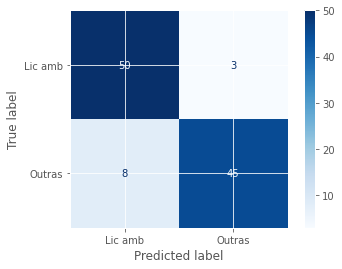

In [330]:
# mostrar a matrix de confusão do modelo sobre todo o dataset
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classificador, X_test, y_test,
                      cmap=plt.cm.Blues,
                      values_format='d', display_labels=('Lic amb', 'Outras'))

In [331]:
X_test.loc[(predicted == 0) & (y_test == 1)]

270    LEI Nº 2.302, DE 11 DE AGOSTO DE 2010 Institui...
512    DECRETO Nº 27.410 DE 11 DE OUTUBRO DE 2010 Pub...
303    LEI N.° 3.262, DE 30 DE MAIO DE 2008 INSTITUI ...
432    DECRETO Nº 33.528, DE 08 DE JUNHO DE 2009. Ins...
372    *LEI COMPLEMENTAR Nº 481, DE 27 DE DEZEMBRO DE...
302    DECRETO N.º 24.237, DE 18 DE MAIO DE 2.004 APR...
324    LEI Nº 13.045, DE 17.07.00 (DO 27.07.00) Dispõ...
413    LEI No 8.608 ESTADO • DA PARAÍBA ,DE 30 DE JUN...
Name: text, dtype: object